# Introduction to CPTAC and Proteomics

This document will take you through the basics of CPTAC and analyzing proteomic data in python. Let's get started!

## Setting up your working directory

Set your working directory to your analysis_data folder.

In [1]:
import os

os.chdir('/mnt/c/analysis_data/')

### Start exploring CPTAC with `cptac`
Similar to TCGAbiolinks, we need to load the package and download the data before using.
1. Import the package (`cptac`).
2. Look at the data sets available to us with the list_datasets() function. As a reminder, remember the package_name.method() syntax!
3. Download the cancer you'll be working with. 
4. Load it into our python environment.

In [2]:
# 1. Import cptac
import cptac

# 2. Examine the data sets available with list_datasets()
cptac.list_datasets()

cptac warning: Your version of cptac (1.1.2) is out-of-date. Latest is 1.5.13. Please run 'pip install --upgrade cptac' to update it. (/home/zwang474/miniconda3/envs/qbio490/lib/python3.9/threading.py, line 917)


,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


In [3]:
# 3. Download the cancer data set -- fill in dataset!
cptac.download(dataset="Brca")

# 4. Load the cancer data
brca = cptac.Brca()

Now, we have our object containing a bunch of data. We can use the list_data() function the data available for the cancer dataset.
<br></br>
In addition to the proteomics data, we can also accesss the accompanying transcriptomics, CNV, etc. using this object. We will focus on the omics which we have already seen for this course; however, other data present in this dataset are also pretty interesting. Finally, many proteins can't be identified very well, so they won't appear as a column (for example, APC isn't in the proteomics data set).
<br></br>
**Exercise 1.1** Call the list_data() function from the object to examine the different data contained in the object. Much like calling functions from a package, we can use the cancer.function() syntax.

* How many patients do you think there are in this dataset? (Make an educated guess about this from the dimensions - we'll confirm your answer later on)

In [4]:
# Run the list_data() function.
brca.list_data()

# We can expect around ~131 patients in this dataset.

Below are the dataframes contained in this dataset and their dimensions:

acetylproteomics
	122 rows
	9868 columns
clinical
	122 rows
	18 columns
CNV
	122 rows
	23692 columns
derived_molecular
	122 rows
	36 columns
phosphoproteomics
	122 rows
	38775 columns
proteomics
	122 rows
	10107 columns
somatic_mutation
	24106 rows
	3 columns
transcriptomics
	122 rows
	23121 columns


**Exercise 1.2** Use the get_proteomics() function to store the proteomics data into a new data frame.

In [5]:
protein_data = brca.get_proteomics() # get the proteomics data
print(protein_data) # view the data

# Uncomment and run this command after you get the data, you don't really need to know what it does but it collapses
# the column names and gets rid of the database_IDs which will make our lives much easier!
protein_data.columns = protein_data.columns.get_level_values(0) 

Name               A1BG         A2M                      A2ML1  \
Database_ID NP_570602.2 NP_000005.2 NP_653271.2|NP_001269353.1   
Patient_ID                                                       
CPT000814       -0.6712     -0.2075                     2.7959   
CPT001846        1.3964      1.3302                    -5.0948   
X01BR001         2.0219      1.6269                    -3.2943   
X01BR008        -0.5290      0.3267                     1.4342   
X01BR009         1.2556      3.4489                     2.8043   
...                 ...         ...                        ...   
X21BR001        -0.6610     -0.6402                    -4.8578   
X21BR002        -1.3735      0.4227                    -4.9553   
X21BR010         1.1583      0.3329                    -5.7358   
X22BR005         0.4948     -1.0986                    -8.8314   
X22BR006         0.5049     -0.6582                    -7.4699   

Name                              AAAS  \
Database_ID NP_056480.1|NP_001166

## (2) Exploring the Data

As mentioned earlier, `cptac` data is in the form of `pandas` dataframes. Let's load that and `numpy`. 

**Exercise 2.1** Import numpy and pandas with their usual shortened names (pd and np).

In [6]:
import numpy as np
import pandas as pd

Remember that we can access the rows/column names of a data frame in two ways:
1. We can get the row and column names together in a list with the `axes` attribute.
2. We can get the row or column names individually in the `index` (row) or `columns` (column) attribute.
<br></br>
**Exercise 2.2** Print the axes, index, and columns of the protein_data object. Then, determine its dimensions using the shape attribute. Finally, answer the following questions:

* How many rows and columns are there in the data frame?  
There are 103 rows and 10686 columns.

* What do the rows and columns represent?  
Rows represent patients and columns represent proteins (i.e. protein expression levels).

* How many patients are there?     
There are 103 patients.

* What about proteins?  
There are 10686 proteins.

In [7]:
# Print properties of protein_data:
print(protein_data.axes)
print(protein_data.index)
print(protein_data.columns)
print(protein_data.shape)

[Index(['CPT000814', 'CPT001846', 'X01BR001', 'X01BR008', 'X01BR009',
       'X01BR010', 'X01BR015', 'X01BR017', 'X01BR018', 'X01BR020',
       ...
       'X20BR002', 'X20BR005', 'X20BR006', 'X20BR007', 'X20BR008', 'X21BR001',
       'X21BR002', 'X21BR010', 'X22BR005', 'X22BR006'],
      dtype='object', name='Patient_ID', length=122), Index(['A1BG', 'A2M', 'A2ML1', 'AAAS', 'AACS', 'AADAT', 'AAED1', 'AAGAB',
       'AAK1', 'AAMDC',
       ...
       'ZSCAN31', 'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='Name', length=10107)]
Index(['CPT000814', 'CPT001846', 'X01BR001', 'X01BR008', 'X01BR009',
       'X01BR010', 'X01BR015', 'X01BR017', 'X01BR018', 'X01BR020',
       ...
       'X20BR002', 'X20BR005', 'X20BR006', 'X20BR007', 'X20BR008', 'X21BR001',
       'X21BR002', 'X21BR010', 'X22BR005', 'X22BR006'],
      dtype='object', name='Patient_ID', length=122)
Index(['A1BG', 'A2M', 'A2ML1', 'AAAS', 'AACS', 'AADAT', 'AAED1',

Remember we can access data by name using `.loc[]` and `.iloc[]`. Since this dataset is really large, we won't really use `.iloc[]` which accesses by index. To get the protein expression information for a specific patient, therefore, we would run something like this: 

In [ ]:
protein_data.loc["patient ID","protein name"] # this is the general case, you have to fill in actual IDs/protein names

**Exercise 2.3** Remember that the numerical data in CPTAC is the relative fold change, not an absolute value/count. Given this, what kind of number would represent lower relative expression? What kind of number would represent higher relative expression? (Hint: reference level is 0) 

In [8]:
# A negative number would represent lower relative expression, and a positive number higher relative expression.

**Exericse 2.4**

Print the relative fold change of 5th patient in the `TP53` protein. Then, interpret this value -- does this patient have higher or lower protein levels than the reference? (Hint: use .loc[] and remember that a `:` can be used in either the row or column slot to access every row or every column.)


In [9]:
protein_data.loc[:, "TP53"]
# This patient has lower protein levels than the reference.

Patient_ID
CPT000814    2.0719
CPT001846   -1.0990
X01BR001     0.8946
X01BR008     1.9239
X01BR009     2.4935
              ...  
X21BR001    -1.2357
X21BR002    -2.9228
X21BR010    -3.6910
X22BR005    -3.7026
X22BR006    -6.2740
Name: TP53, Length: 122, dtype: float64

### Using Boolean indexing

In R, we used the `ifelse()` function very heavily to assign categories, such as classifying patients as "old" or "young". In Python, we have the `where(COND, TRUE_VAL, FALSE_VAL)` function from numpy, which works extremely similarly to ifelse(). That is:

   1. The first parameter is the condition (a boolean vector; i.e. Trues and Falses).
   2. The second parameter is the value to fill the True conditions.
   3. The third parameter is the value to fil lthe False conditions.
    
The following example (split into the four code blocks below) shows how to apply the `where()` function, in the context of telling if a number is odd or even.

In [10]:
# first let's create our example array

number_example_array = pd.DataFrame({"nums": [0, 1, 2, 3, 4, 5]})
number_example_array

,nums
0,0
1,1
2,2
3,3
4,4
5,5


In [11]:
# now, let's make a boolean vector where odds will be True, evens will be False
boolean_vector = (number_example_array % 2 == 1)
boolean_vector

,nums
0,False
1,True
2,False
3,True
4,False
5,True


In [12]:
# then add this vector as a column in our array (we could do this and the above in one step)
number_example_array["boolean_vector"] = boolean_vector
number_example_array

,nums,boolean_vector
0,0,False
1,1,True
2,2,False
3,3,True
4,4,False
5,5,True


In [13]:
# lastly, let's add a third column called "parity" that says based off of "boolean_vector" if our value is odd/even
number_example_array["parity"] = np.where(boolean_vector, "Odd", "Even")
number_example_array

,nums,boolean_vector,parity
0,0,False,Even
1,1,True,Odd
2,2,False,Even
3,3,True,Odd
4,4,False,Even
5,5,True,Odd


**Exercise 2.5** Access the following:

1. Use boolean indexing to access the patient IDs with high (≥1) `TP53` expression. Save this in a pandas DataFrame called `high_TP53`. HINTS:
    * Think about if protein expression information will be contained in a row or a column!
    * Create a boolean mask with the row/column that contains the expression information of `TP53`.
    * Apply the mask to the row/column names that contains the patient IDs.
2. How many patients are there in `high_TP53`? Which axis (columns or rows) represents proteins?
3. Add a column to `high_TP53` that has the values "High"/"Average"/"Low" based on ARF1 expression.
4. How many patients have high expression of both `TP53` and average expression of `ARF1`?

In [14]:
# 1. Use boolean indexing to access the patient IDs with high (≥1) TP53 expression. Save this in a pandas DataFrame called high_TP53:
mask = protein_data.loc[protein_data["TP53"] >= 1, :]
high_TP53 = pd.DataFrame({"TP53" : mask["TP53"]})

# 2. How many patients are there in high_TP53? Which axis (columns or rows) represents proteins?
print(high_TP53.shape)
# There are 11 patients in high_TP53. Columns represent proteins.

# 3. Add a column to high_TP53 that has the values "High"/"Average"/"Low" based on ARF1 expression.
high_TP53["ARF1"] = np.where(mask["ARF1"] >= 1, "High", np.where(mask["ARF1"] <= -1, "Low", "Average"))

# 4. How many patients have high expression of both TP53 and average expression of ARF1?
# Of 11 patients, 9 have high expression of TP53 and average expression of ARF1.

high_TP53

(11, 1)


,TP53,ARF1
Patient_ID,,
CPT000814,2.0719,Average
X01BR008,1.9239,Average
X01BR009,2.4935,Average
X01BR018,2.2508,Average
X01BR027,4.6305,Average
X01BR031,7.1055,Low
X03BR006,2.0201,Average
X05BR001,1.1979,Average
X05BR043,2.1407,Low


## (3) Additional data in CPTAC

You can also access other data using the `cptac` python package for the same patients, using the corresponding get function.

**Exercise 3.1** Access the RNA (transcriptomics) and clinical data from the object. The function name is very similar in syntax to the get_proteomics() function from before!

In [15]:
rna_data = brca.get_transcriptomics()
clinical_data = brca.get_clinical()

**Exercise 3.2** Examine these dataframes. In particular:

* What do the values in the rna_data data frame represent?
* Compare the dimensions of the high_TP53, rna_data, and clinical_data. Are they equal?

In [16]:
# 1. What do the values in the rna_data data frame represent?
# The values represent count data. 

# 2. Compare the dimensions of the high_TP53, rna_data, and clinical_data. Are they equal?
# No, the dimensions of high_TP53 differ from rna_data and clinical_data.
print(high_TP53.shape)
print(rna_data.shape)
print(clinical_data.shape)

(11, 2)
(122, 23121)
(122, 18)


The dimensions for each dataframe might not be equal depending on if you masked some patients. That's where the `intersect1d()` function from numpy becomes really useful, especially if we want to analyze transcriptomics, proteomics, and clinical data together. This lets us see which patient barcodes are shared between the data frames.


Let's take a look at all of the patients who are older than 50 years old at the time of diagnosis. 
<br></br>
**Exercise 3.3**
1.  Use the clinical data DataFrame to create a boolean mask for the condition of patients being older than 50.
2.  Mask the clinical data and assign it to a DataFrame called 'masked_clinical'.

In [17]:
# 1. Use the clinical data DataFrame to create a boolean mask for the condition of patients being older than 50:
mask = clinical_data["Age.in.Month"] >= (50 * 12)

# 2. Mask the clinical data and assign it to a DataFrame called 'masked_clinical'.
masked_clinical = clinical_data.loc[mask, :]
masked_clinical

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status
Patient_ID,,,,,,,,,,,,,,,,,,
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR018,X01BR018,Tumor,7,129N,Stage IIIA,1.0,Basal,Basal-I,0.915,792.0,female,white,positive,negative,negative,negative,negative,negative
X01BR025,X01BR025,Tumor,9,127N,Stage IIIA,6.0,LumA,LumB-I,0.551,744.0,female,black.or.african.american,positive,positive,equivocal,negative,negative,negative
X01BR027,X01BR027,Tumor,3,127N,Stage IIA,8.0,Basal,Basal-I,1.000,960.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR030,X01BR030,Tumor,7,128C,Stage IIIA,4.0,LumA,LumA-I,0.409,1010.0,female,black.or.african.american,positive,positive,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X20BR006,X20BR006,Tumor,17,128N,Stage IIB,18.0,Basal,Basal-I,0.728,786.0,female,white,positive,negative,negative,negative,negative,negative
X20BR007,X20BR007,Tumor,5,130N,Stage IIA,16.0,Basal,Basal-I,0.609,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X20BR008,X20BR008,Tumor,5,127C,Stage IIIB,11.0,Her2,HER2-I,0.481,863.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative


Now that we have masked our data, if we tried to do an analysis using the different data frames, we would get a lot of errors since we are now missing some patients in our masked_clinical data frame. If we want to get the patients who are present in the masked data as well as the rna_data and protein_data, we can use intersect1d().

**Exercise 3.4**
1. Use `intersect1d()` from np to create a list that contains the patient IDs for each pair of data frames as mentioned below. (Hint: this function takes two 1d arrays, which would be patient IDs from two different dataframes. How do we get this from each dataframe? Are patient IDs rows or columns?) 
2. Use a for loop to print the lengths of these three data frames, and compare them to the number of rows. The for loop skeleton is below. What do you notice about the three lengths? Do the numbers correspond to anything in particular?
3. Finally, identify which intersection contains the patient IDs where there is data for all three levels of data (proteomics, transcriptomics, and clinical). How can we tell?

In [18]:
# 1.
name_intersects = [
      np.intersect1d(protein_data.index, rna_data.index)
    , np.intersect1d(protein_data.index, masked_clinical.index)
    , np.intersect1d(rna_data.index, masked_clinical.index)
]

# 2. Print the lengths here
for list in name_intersects:
    print(f"The length of {list} is {len(list)}") 
# The lengths of the proteomic/rna and clinical intersections are equal, but they differ from the proteomic and rna intersection.
    
# 3. Which comparison(s) contain the patient names that have all three levels?
# The intersection of proteomic/rna and clinical data contains data for all three levels, as their lengths are equal. 

The length of ['CPT000814' 'CPT001846' 'X01BR001' 'X01BR008' 'X01BR009' 'X01BR010'
 'X01BR015' 'X01BR017' 'X01BR018' 'X01BR020' 'X01BR023' 'X01BR025'
 'X01BR026' 'X01BR027' 'X01BR030' 'X01BR031' 'X01BR032' 'X01BR033'
 'X01BR040' 'X01BR042' 'X01BR043' 'X03BR002' 'X03BR004' 'X03BR005'
 'X03BR006' 'X03BR010' 'X03BR011' 'X03BR013' 'X05BR001' 'X05BR003'
 'X05BR004' 'X05BR005' 'X05BR009' 'X05BR016' 'X05BR026' 'X05BR029'
 'X05BR038' 'X05BR042' 'X05BR043' 'X05BR044' 'X05BR045' 'X06BR003'
 'X06BR005' 'X06BR006' 'X06BR014' 'X09BR001' 'X09BR004' 'X09BR005'
 'X09BR007' 'X11BR003' 'X11BR004' 'X11BR006' 'X11BR009' 'X11BR010'
 'X11BR011' 'X11BR012' 'X11BR013' 'X11BR014' 'X11BR015' 'X11BR016'
 'X11BR017' 'X11BR018' 'X11BR019' 'X11BR020' 'X11BR022' 'X11BR023'
 'X11BR024' 'X11BR025' 'X11BR027' 'X11BR028' 'X11BR030' 'X11BR031'
 'X11BR032' 'X11BR036' 'X11BR038' 'X11BR040' 'X11BR042' 'X11BR043'
 'X11BR044' 'X11BR047' 'X11BR049' 'X11BR050' 'X11BR051' 'X11BR053'
 'X11BR054' 'X11BR055' 'X11BR056' 'X11BR058' '

## (4) Examining the Clinical Data

Let's explore the clinical data in more detail.

First, use head() to glance as to what data is available.

In [19]:
clinical_data.head()

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status
Patient_ID,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative


**Exercise 4.1** You might notice that the Age column values don't look like years -- they're in months. Create a new column called "Age" with the "Age.in.Month" values / 12. Then, use head() again to make sure the ages were converted.

In [20]:
clinical_data["Age"] = clinical_data["Age.in.Month"] / 12
clinical_data.head()

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status,Age
Patient_ID,,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative,NaN
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative,NaN
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative,55.0
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative,NaN
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative,NaN


There may be control (non-cancer) tissue samples in some datasets. Let's determine whether we need to account for this in our dataset this using the unique() function from numpy.

__Exercise 4.2__ Call the unique() function on the Sample_Tumor_Normal column. The function will return the unique values in the column in a sorted order -- this is super useful for examining categorical variables, like tumor stage and tumor status, for example.

In [21]:
# Get the levels of the Sample_Tumor_Normal column with unique()
np.unique(clinical_data["Sample_Tumor_Normal"])

array(['Tumor'], dtype=object)

__Exercise 4.3__ Let's examine how tumor stage varies as a function of age:

   1. Import the plotting libraries matplotlib.pyplot and seaborn (use the standard abbreviations presented last time, seaborn is sns).
   2. Create an age_category column in clinical_data. Define "Young" as under the median age, and "Old" as the median age and older. (Hint: use the where() function from numpy, the equivalent to ifelse()).
   3. The "Stage" information for some of these patients is NaN (the pandas version of NA). Use the isna() function from pandas and boolean indexing (i.e. where() from numpy again) to remove any patients with NaN values in "Stage".
   4. Using nested for loop and boolean indexing, count the number of old and young patients that have Stage I, Stage II, Stage III, and Stage IV cancer.
   5. Use the skeleton code to draw the barplot. Do your numbers make sense?

In [22]:
# 1. Import libraries here
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create the age_category column in clinical_data
median = clinical_data["Age"].median()
clinical_data["age_category"] = np.where(clinical_data["Age"] >= median, "Old", "Young")

# 3. Filter out NaN
mask = ~pd.isna(clinical_data["Stage"])
clinical_data = pd.DataFrame(clinical_data[mask])

## this will programatically get all the stages in order
stage_categories = np.unique(clinical_data.loc[:, 'Stage'])
assert(np.all(stage_categories == ['Stage IA', 'Stage IIA', 'Stage IIB',
                                    'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC']))

# 4. Loop through all the stage categories and count
# for age_cat in ["Old", "Young"]: # first get the old data, then the young data
#     print(age_cat)
#     # fill this in with the cancer category:
#     for stage in stage_categories:
#         subset = clinical_data[clinical_data["age_category"] == age_cat]
#         print(f'{stage}: {subset["Stage"].count(stage)}')
        
# 5. Create a barplot to compare your results
# sns.countplot(
#    x = "age_category",
#    hue = "Stage",
#    hue_order = stage_categories,
#    data = INSERT HERE
# )

plt.show()    

## (5) Plotting Proteomic Data

Let's explore how the proteomic expression of a gene differs between young and old patients.

**Exercise 5.1** Plot the expression data of a chosen protein stratified between patients older and younger than the median age.

In [23]:
young_mask = clinical_data.loc[clinical_data["age_category"] == "Young", :] # look at the columns of the clinical data to see what column to get age information
old_mask = clinical_data.loc[clinical_data["age_category"] == "Old", :]

young = protein_data.loc[protein_data.index.isin(young_mask), :]
young = young["C17orf47"]
old = protein_data.loc[protein_data.index.isin(old_mask), :]
old = old["C17orf47"]

data = [old.values, young.values] # our boxplot function will require an array (or an array of arrays)
data

[array([], dtype=float64), array([], dtype=float64)]

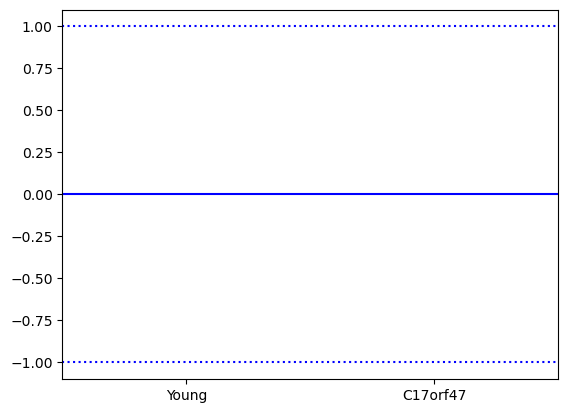

In [24]:
fig, ax = plt.subplots()

plt.axhline(y = 0, color = 'blue', linestyle = '-')
plt.axhline(y = -1, color = 'blue', linestyle = ':')
plt.axhline(y = 1, color = 'blue', linestyle = ':')


bp = ax.boxplot(data) # data goes here
plt.xticks([1, 2], ["Young", "C17orf47"]) # use \n for new line if desired


plt.show()

**Exercise 5.2** Why do you think we added lines at -1, 0, and 1? What do these values represent in terms of log2FoldChange?

In [25]:
# These lines are thresholds for upregulation, no change, and downregulation.

## (6) SciPy
Another question to ask is if the levels of RNA expression correlate with protein expression. While we would expect for there to be a 1:1 relationship between RNA and protein (according to the central dogma), as you will see, this is not what we oftentimes observe.

In [26]:
from scipy import stats # we are using the stats package in particular

The first thing we need to do is to identify which patients and genes are shared between the transcriptomic and proteomic data sets.

For some cancer, patients doesn't have clinical or transcriptomic data in CPTAC. We need to use intersect1d() to fix this. We also need to use intersect1d() to determine which genes are shared.

**Exercise 6.1** To make sure the data frames match:

1. Identify patients that are shared between transcriptomic and proteomics data (hint: use intersect1d()). 
2. Identify the names of the genes that are shared between the two datasets (hint: use intersect1d()). Is this data the row or column names?
3. Create the rna_shared and prot_shared data frames; ie dataframes with only genes and patients that are shared between rna and protein data. (Hint: how can we access rows/columns by name?).

In [27]:
# 1. Identify the patients shared between RNA and protein data.
shared_patients_prot = np.intersect1d(protein_data.index, rna_data.index)

# 2. Identify the genes (RNA, protein) shared between the two data sets 
shared_rna_prot = np.intersect1d(protein_data.columns, rna_data.columns)

# 3. Create the two data frames
rna_shared = rna_data.loc[shared_patients_prot, shared_rna_prot]
prot_shared = protein_data.loc[shared_patients_prot, shared_rna_prot]

Now, we can see how correlated the RNA and protein levels are. We'll use Spearman correlation from the stats library, which is spearmanr().

**Exercise 6.2** Choose a gene and get the Spearman correlation of the rna to protein of that gene.

In [28]:
# we need the nan_policy="omit" to throw out NaN values
corr, pval = stats.spearmanr(rna_shared["C17orf47"], prot_shared["C17orf47"], nan_policy="omit")

print(f"The correlation of FILL IN HERE is {round(corr, 3)} (p = {round(pval, 10)}).")

The correlation of FILL IN HERE is 1.0 (p = 0.0).


**Exercise 6.3** What is your gene's Spearman correlation? What does that mean mathematically? What could this represent biologically? Look into the literature to see if it corroborates this idea.

In [29]:
# C17orf47 has Spearman correlation of 1.0, or a p-value of 0.0. Mathematically, this indicates statistical significance 
# between proteomic and transcriptomic expression. Biologically, this suggests that transcription and translation of 
# C17orf47 are closely related.

## (7) Heatmaps
**Exercise 7.1** A problem arises if we want to compare many correlations. Heatmaps are useful for visualizing a large number of comparisons. To make a heatmap, we'll use the heatmap() function from seaborn. Let's do the following:

1. Set up our data frame to hold all comparisons. All you need to do is to access the first 20 gene names.
2. Calculate the correlations for the first 20 genes (just to save time). You'll need to use two for loops.
3. Call heatmap() -- this is filled in for you!
4. Interpret the data. There is a "light" diagonal along the heatmap from the top-left to bottom-right. Is this expected? Why or why not?

In [30]:
import seaborn as sns

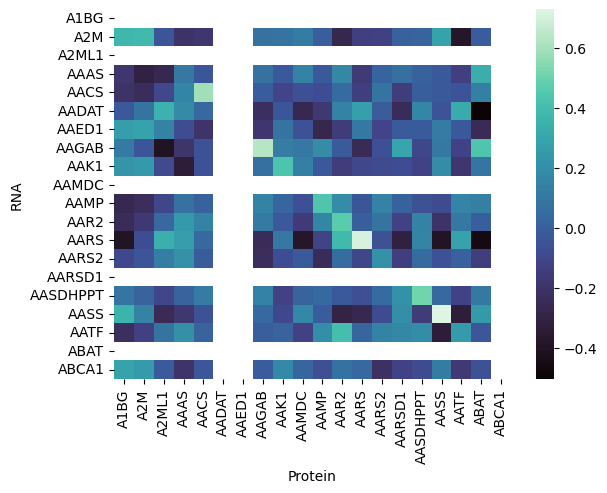

In [31]:
ncomparisons = 20 # define this variable in case we want to change the number of correlations to test
                  # this makes it less likely you'll forget to change a number, e.g. in the data frame shape
gene_names = rna_shared.columns[0:ncomparisons] # get the first ncomparisons gene names

# Don't worry about this code
# It's good practice to declare your data frame beforehand (it's much faster than appending to a list)
# We fill everything in with 0 just as a placeholder
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons)),
                      index = gene_names,
                      columns = gene_names)

# 2. fill in the data frame!
for g1 in gene_names:
    for g2 in gene_names:
        # calculate the correlations between protein and RNA
        # then, use .loc[] to store the correlation in corr_df
        corr, pval = stats.spearmanr(rna_shared[g1], prot_shared[g2])
        corr_df.loc[g1, g2] = corr

# 3. create the heat map
plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('Protein', fontsize=10)
plot.set_ylabel('RNA', fontsize=10)
plt.show()

# 4. interpret!
# The light diagonal is expected in most cases, as protein-coding genes are likely to be closely transcribed and translated.

## (8) More with Seaborn
seaborn is a nice package which works well with matplotlib and makes prettier plots with more control over the figure.

Here's how you make a scatter plot with seaborn, for example:

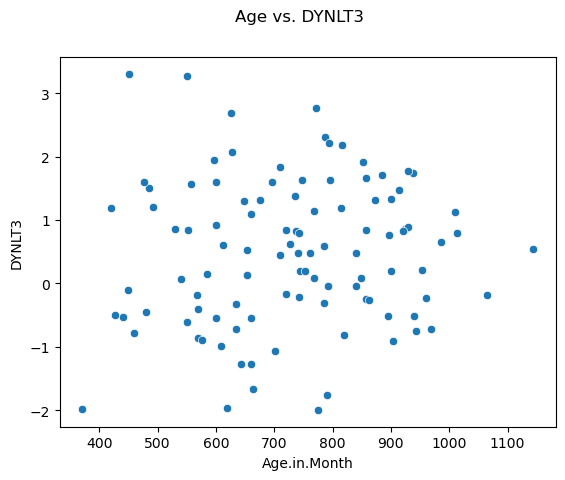

In [32]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

plt.show()

**Exercise 8.1** Update the above plot to:

1. Have age in years instead of months.
2. Color patients based on gender (or another clinical variable of your choosing)
3. Have a side-by-side second plot with a different protein of your choosing

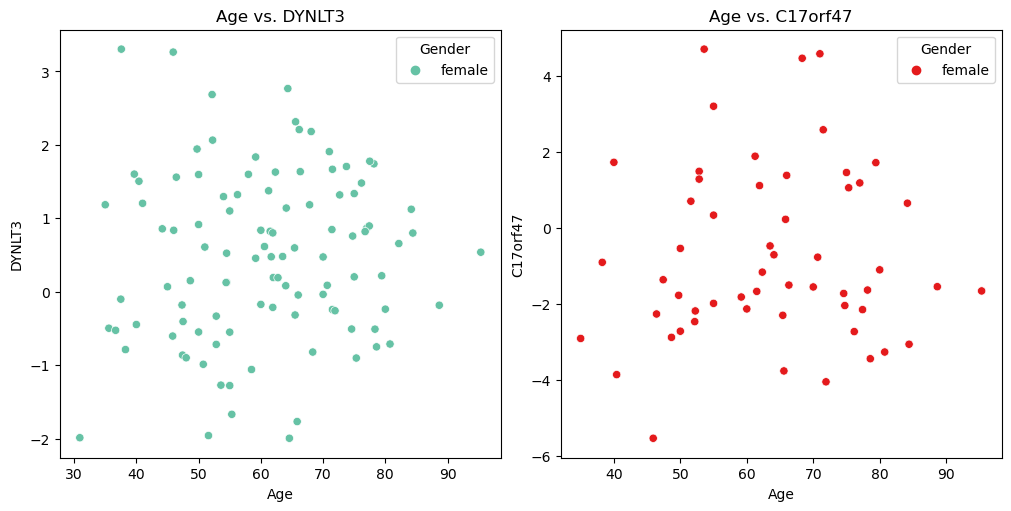

In [33]:
# Create a single figure with two scatterplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Generate first scatterplot for DYNLT3.
sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax1,
    hue = clinical_data.loc[:, "Gender"],
    palette = "Set2",
)
ax1.set_title('Age vs. DYNLT3')  # set title

# Generate second scatterplot for C17orf47.
sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age"],
    y = protein_data.loc[:, "C17orf47"],# y-axis
    legend = "full",  # show the legend
    ax = ax2,
    hue = clinical_data.loc[:, "Gender"],
    palette = "Set1",
)
ax2.set_title('Age vs. C17orf47')  # set title

plt.show()

## (9) Saving Plots
Remember, to save a plot, we can call plt.savefig() instead of the plt.show().

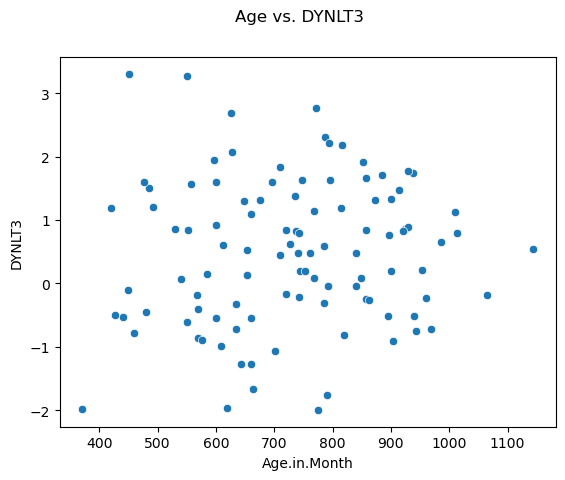

In [34]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

# age_scatter.png is a relative path so check your working directory before running it
plt.savefig('age_scatter.png', bbox_inches='tight')

# Exercises
Only this section will be graded!
## 1. Drawing Connections
1. Choose a clinical variable and segment the cohort into two groups. 
2. Find out what the 5 most differentially expressed genes are (we aren't going to do this in a sophisticated way like DESeq, instead just take the mean expression of every single gene within a group and find the gene which has the greatest difference in mean between the two groups)
3. Create two scatter plots, side by side, each with one group. Within the scatter plots, plot RNA expression versus protein expression for each of the genes in a different color.
4. Add appropriate legend, title, and labels.

Name                                     
C17orf47    3.138650
CSN3        3.036214
APOM        2.756800
GABRG2      2.697513
MAK         2.500650
dtype: float64


Text(0.5, 1.0, 'Young Patients')

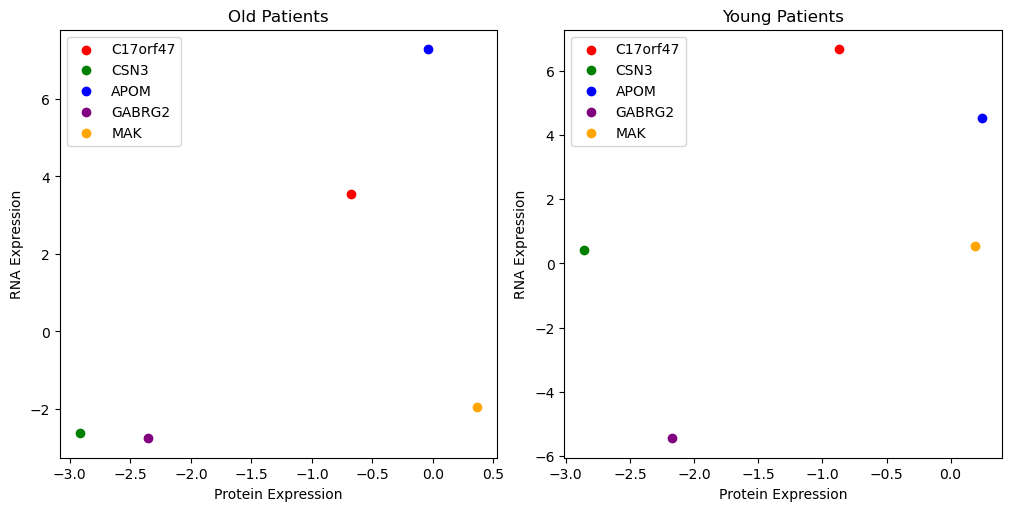

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cptac

cptac.download(dataset="Brca")
brca = cptac.Brca()

rna_data = brca.get_transcriptomics()
clinical_data = brca.get_clinical()
protein_data = brca.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 

# 1. Choose a clinical variable and segment the cohort into two groups.
#######################################################################
# Subset into old/young groups based on median age.

# Convert age in months to age in years.
clinical_data["Age"] = clinical_data["Age.in.Month"] / 12

# Filter NaNs.
mask = ~pd.isna(clinical_data["Age"])
clinical_data = pd.DataFrame(clinical_data[mask])

# Create age_category column based on median age of patients.
median = clinical_data["Age"].median()
clinical_data["Age_Category"] = np.where(clinical_data["Age"] >= median, "Old", "Young")

# Subset into old/young groups.
clinical_old = clinical_data.loc[clinical_data["Age_Category"] == "Old", :]
patients_old = clinical_old.index
clinical_young = clinical_data.loc[clinical_data["Age_Category"] == "Young", :]
patients_young = clinical_young.index

# Subset rna and proteomic data to include shared genes/patients only.
shared_patients = rna_data.index.intersection(protein_data.index)
shared_genes = rna_data.columns.intersection(protein_data.columns)
rna_data = rna_data.loc[shared_patients, shared_genes]
protein_data = protein_data.loc[shared_patients, shared_genes]

# 2. Find out what the 5 most differentially expressed genes are.
#######################################################################
# Subset rna data into old/young groups.
rna_young = rna_data[rna_data.index.isin(patients_young)]
rna_old = rna_data[rna_data.index.isin(patients_old)]

# Calculate mean expression for all genes.
rna_young_mean = rna_young.mean()
rna_old_mean = rna_old.mean()

# Calculate difference in mean expressions.
rna_expr_diff = abs(rna_old_mean - rna_young_mean)

# Sort by magnitude of difference in mean expression and print top five DEGs.
rna_degs = rna_expr_diff.sort_values(ascending=False).head(5)
print(rna_degs)

# Subset and calculate mean expression for proteomic data.
protein_young = protein_data[protein_data.index.isin(patients_young)]
protein_old = protein_data[protein_data.index.isin(patients_old)]
protein_young_mean = protein_young.mean()
protein_old_mean = protein_old.mean()

# 3. Create two scatter plots, side by side, each with one group.
#######################################################################
# Create a single figure with two scatterplots.
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Define colors for the top 5 DEGs
colors = ['red', 'green', 'blue', 'purple', 'orange']

# For each age category:
for i, (df_rna, df_protein) in enumerate([(rna_old_mean, protein_old_mean), (rna_young_mean, protein_young_mean)]):
    # For each of the top 5 DEGs:
    for j, gene in enumerate(rna_degs.index):
        # Plot RNA expression versus protein expression.
        axs[i].scatter(df_protein[gene], df_rna[gene], color=colors[j], label=gene)

    # Set labels and legend.
    axs[i].set_xlabel('Protein Expression')
    axs[i].set_ylabel('RNA Expression')
    axs[i].legend()

# Set titles.
axs[0].set_title("Old Patients")
axs[1].set_title("Young Patients")


## 2. Interpretation Skills
This section is short-answer based written responses. Please respond in 2-3 sentences to each question below for full credit.
1. What do the numbers within the protein and transcriptomics DataFrames represent? Why do we represent them this way?
2. Why are there fewer columns in the protein DataFrame than the transcriptomics one?
3. Explain how the central dogma may be broken in between DNA -> RNA -> Proteins and how this might affect our proteomics data.
4. Why is proteomics data relatively scarce compared to sequencing data?
5. Should we ever expect protein expression to be 0 in a tumor sample?
6. What are protein domains and how do they relate to the role of a protein?


In [36]:
# 1. What do the numbers within the protein and transcriptomics DataFrames represent? Why do we represent them this way?
# The numbers within the protein and transcriptomics dataframes represent the expression levels of proteins and mRNA 
# transcripts, respectively. We represent them this way to quantify their abundance, which is crucial for understanding 
# cellular functions and disease states.

# 2. Why are there fewer columns in the protein DataFrame than the transcriptomics one?
# There are fewer columns in the protein dataframe as the vast majority of genes are not protein-coding. Additionally, 
# the process of protein identification and quantification is more complex and less comprehensive than transcriptomics, 
# leading to data for fewer proteins.

# 3. Explain how the central dogma may be broken in between DNA -> RNA -> Proteins and how this might affect our proteomics 
#    data.
# The central dogma may be broken due to processes like RNA editing and alternative splicing, which can create protein 
# variants not directly predicted by the DNA sequence. This might affect our proteomics data by introducing additional 
# complexity and diversity.

# 4. Why is proteomics data relatively scarce compared to sequencing data?
# Proteomics data is relatively scarce compared to sequencing data because protein extraction and identification is 
# technically challenging, time-consuming, and expensive compared to DNA/RNA sequencing.

# 5. Should we ever expect protein expression to be 0 in a tumor sample?
# No, we should not expect protein expression to be 0 in a tumor sample. Even in diseased states, cells are likely to 
# express a wide range of proteins, albeit at different levels compared to healthy cells.

# 6. What are protein domains and how do they relate to the role of a protein?
# Protein domains are distinct functional and/or structural units in a protein. They are critical for functionality, 
# as they often mediate specific protein-protein interactions and determine a protein’s specific function.

## 3. Challenge Exercise - Incorporating Genomics
This exercise is optional and is worth extra credit up to 5 points. The combined extra credit between challenge exercises will cap out at 5 points total.
<br></br>
We can get somatic mutation data for cptac patients the same way we get proteomics, transcriptomical, or clinical. Let's explore some aspects of it.
1. Save the cancer somatic mutation data to `mutation_data`
2. Determine the top 10 most commonly mutated genes within the dataset.
3. Determine what percent of patients have a mutation in at least one of those genes.
4. Create a bar plot that shows percent percent of patients that have exactly 0-10 out of 10 of those mutations. Name axes and titles appropriately.

In [37]:
# write code here